In [ ]:
import os
import math
import random
import numpy as np
import pandas as pd
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import Subplot

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [ ]:
from pandas import concat
from pandas import read_csv
from pandas import DataFrame
from pandas import concat

In [ ]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

### SVAR Equation

Structural Var with p lags:
    
$$ \Gamma_0 Y_t = \delta + \Gamma_1 Y_{t-1} + \Gamma_2 Y_{t-2} + ... + \Gamma_p Y_{t-p} + u_t $$

Structural Var with p lags:
    
$$ Y_t = c + \Phi_1 Y_{t-1} + \Phi_2 Y_{t-2} + ... + \Phi_p Y_{t-p} + \epsilon_t $$

Structural Var with p lags:
    
$$ 
\begin{bmatrix} 
\epsilon^{is}_{1,t} \\ \epsilon^{ps}_{1,t} \\ \epsilon^{gs}_{1,t} \\ 
\epsilon^{mss}_{1,t} \\ \epsilon^{irs}_{1,t} \\ \epsilon^{sms}_{1,t}
\end{bmatrix}
=
\begin{bmatrix} 
a(1) & 0 & 0 & 0 & 0 & 0  \\
a(2) & a(3) & 0 & 0 & 0 & 0  \\
a(4) & a(5) & a(6) & 0 & 0 & 0  \\
a(7) & a(8) & a(9) & a(10) & 0 & 0 \\
a(11) & a(12) & a(13) & a(14) & a(15) & 0 \\
a(16) & a(17) & a(18) & a(19) & a(20) & a(21) \\
\end{bmatrix}
x
\begin{bmatrix} 
\epsilon^{GDP}_{1,t} \\ \epsilon^{CPI}_{1,t} \\ \epsilon^{GOV}_{1,t} \\ 
\epsilon^{M1}_{1,t} \\ \epsilon^{FED}_{1,t} \\ \epsilon^{SP500}_{1,t}
\end{bmatrix}
$$

$$ \Phi_k = \Gamma_0^{-1}\Gamma_k , c = \Gamma_0^{-1}\delta, \epsilon_t = \Gamma_0^{-1} u_t $$

### Sources

https://towardsdatascience.com/vector-autoregressions-vector-error-correction-multivariate-model-a69daf6ab618

https://towardsdatascience.com/predicting-fang-stock-prices-ecac4ddd27c1

### Ingest Data

In [ ]:
data = pd.read_excel(os.path.join("./Data/Quarterly/","Combined Quarterly Data.xlsx"),sheet_name='Combined')

In [ ]:
print(data)

    observation_date            M1      IGREA        GDP         CPI  \
0         1970-04-01    207.166667  54.470539   1067.375   38.633333   
1         1970-07-01    209.900000  53.289409   1086.059   39.033333   
2         1970-10-01    213.666667  43.277180   1088.608   39.600000   
3         1971-01-01    217.233333  -8.874567   1135.156   39.933333   
4         1971-04-01    221.833333 -35.626558   1156.271   40.300000   
..               ...           ...        ...        ...         ...   
201       2020-07-01  16939.200000  -1.205084  21138.574  259.421333   
202       2020-10-01  17582.766667 -13.895149  21477.597  260.983000   
203       2021-01-01  18386.566667  10.359063  22038.226  263.395000   
204       2021-04-01  19119.533333  57.356076  22740.959  268.788000   
205       2021-07-01  19650.700000  84.922145  23173.496  273.138333   

     Interbank_Loan  Government_Expenditure   SP_500  
0          7.886667                 339.049    81.52  
1          7.676667      

### Visualise Data

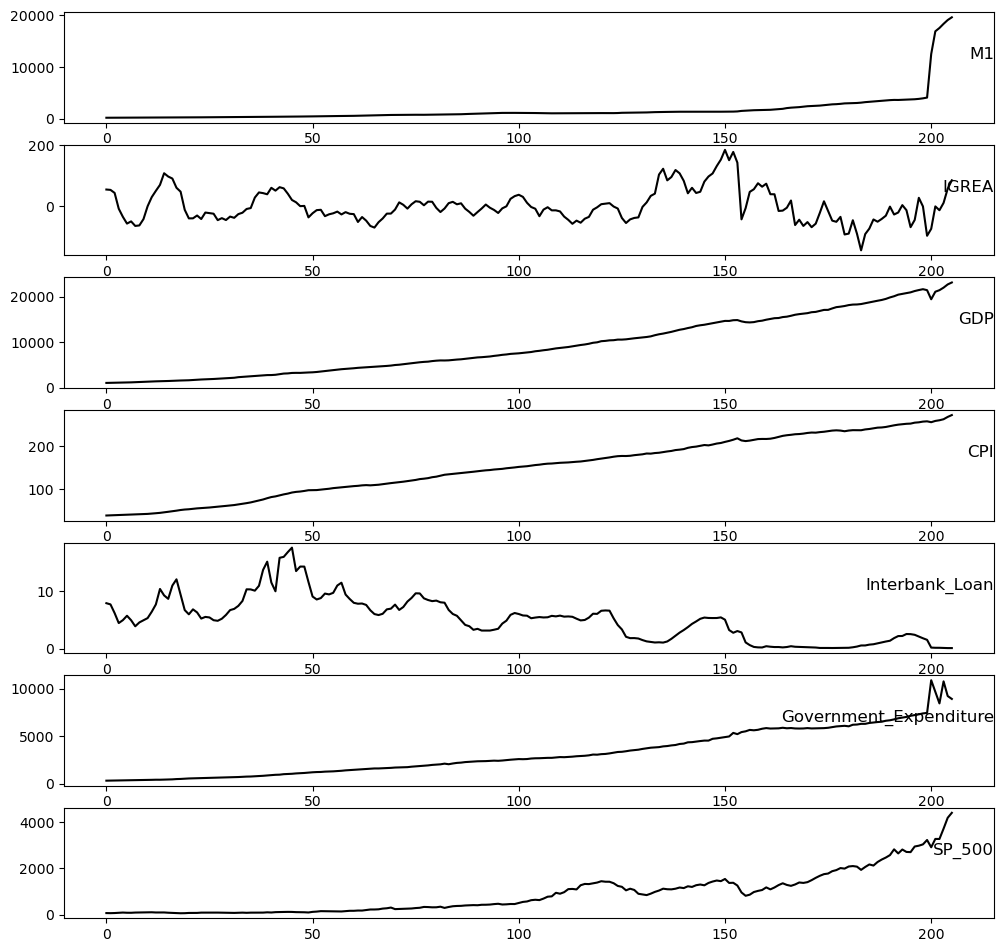

In [ ]:
values = data.values
# specify columns to plot
groups = [1, 2, 3, 4, 5, 6, 7]
i = 1
# plot each column
plt.figure(figsize=(12,12), dpi= 100, facecolor=None, edgecolor='k', clear=True)
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group], color="black")
    plt.title(data.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

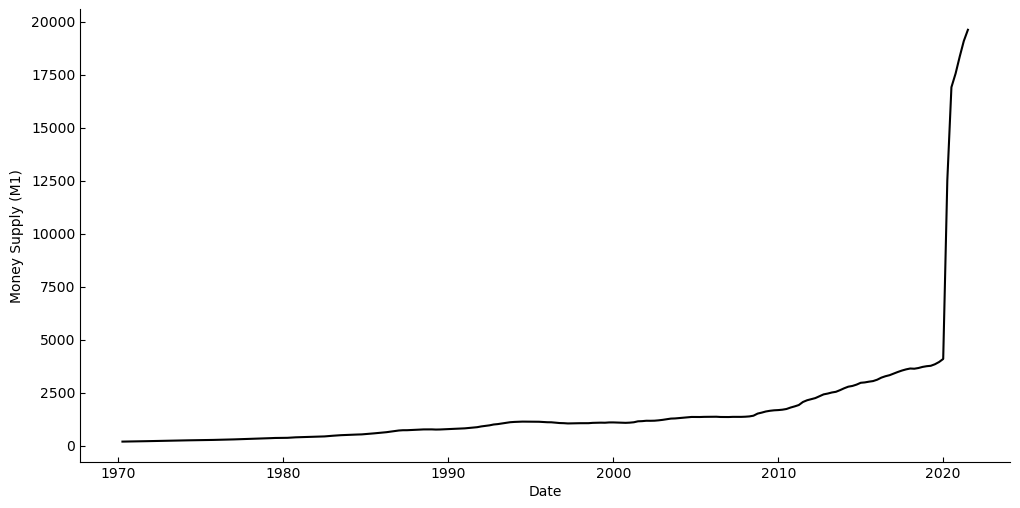

In [ ]:
fig = plt.figure(figsize=(12,6), dpi= 100, facecolor=None, edgecolor='k', clear=True)
ax = Subplot(fig, 111)
fig.add_subplot(ax)
ax.axis["right"].set_visible(False)
ax.axis["top"].set_visible(False)
plt.xlabel('Date')
plt.ylabel('Money Supply (M1)')
plt.plot(data.observation_date, data.M1, color="black")
plt.show()

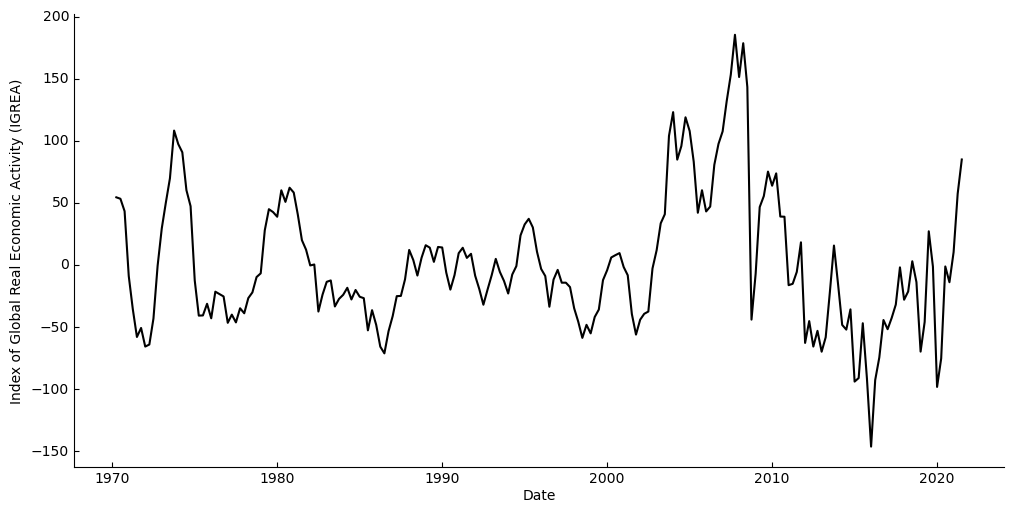

In [ ]:
fig = plt.figure(figsize=(12,6), dpi= 100, facecolor=None, edgecolor='k', clear=True)
ax = Subplot(fig, 111)
fig.add_subplot(ax)
ax.axis["right"].set_visible(False)
ax.axis["top"].set_visible(False)
plt.xlabel('Date')
plt.ylabel('Index of Global Real Economic Activity (IGREA)')
plt.plot(data.observation_date, data.IGREA, color="black")
plt.show()

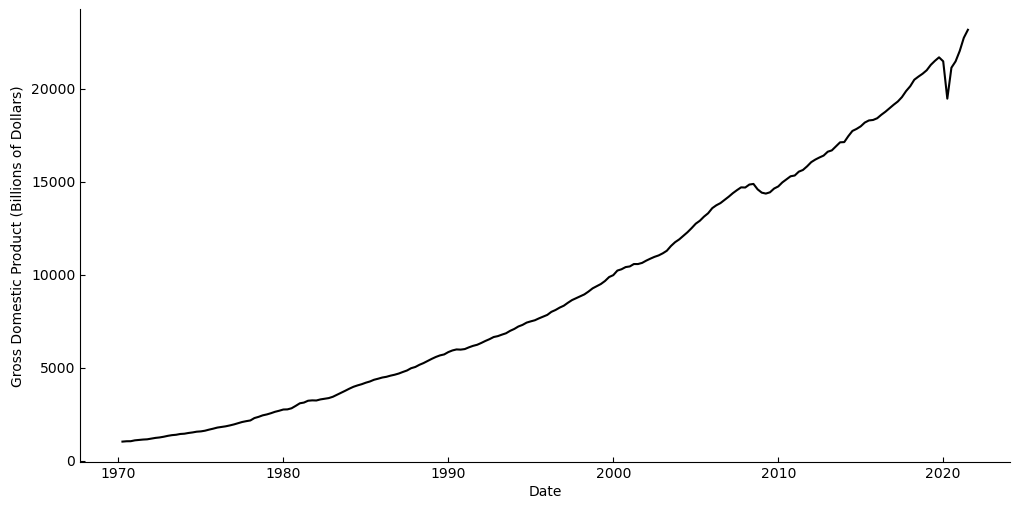

In [ ]:
fig = plt.figure(figsize=(12,6), dpi= 100, facecolor=None, edgecolor='k', clear=True)
ax = Subplot(fig, 111)
fig.add_subplot(ax)
ax.axis["right"].set_visible(False)
ax.axis["top"].set_visible(False)
plt.xlabel('Date')
plt.ylabel('Gross Domestic Product (Billions of Dollars)')
plt.plot(data.observation_date, data.GDP, color="black")
plt.show()

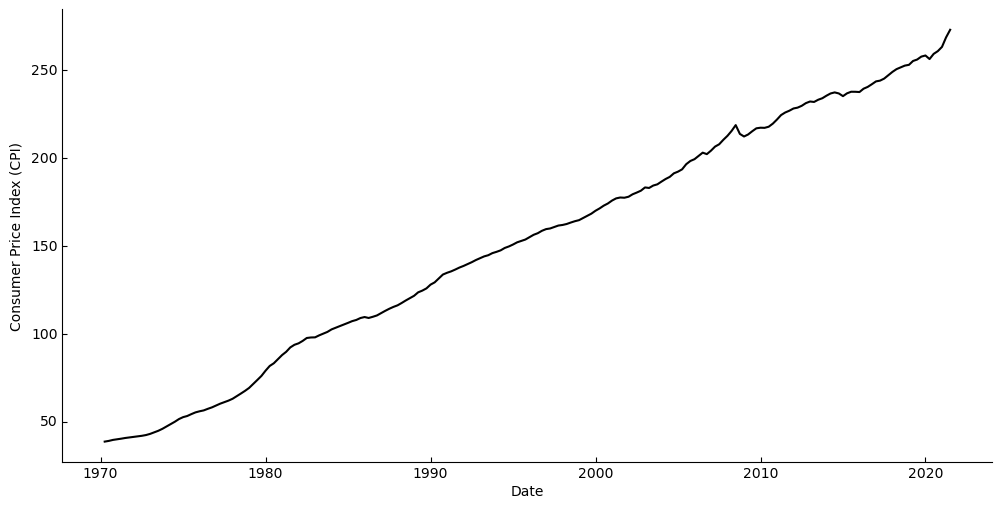

In [ ]:
fig = plt.figure(figsize=(12,6), dpi= 100, facecolor=None, edgecolor='k', clear=True)
ax = Subplot(fig, 111)
fig.add_subplot(ax)
ax.axis["right"].set_visible(False)
ax.axis["top"].set_visible(False)
plt.xlabel('Date')
plt.ylabel('Consumer Price Index (CPI)')
plt.plot(data.observation_date, data.CPI, color="black")
plt.show()

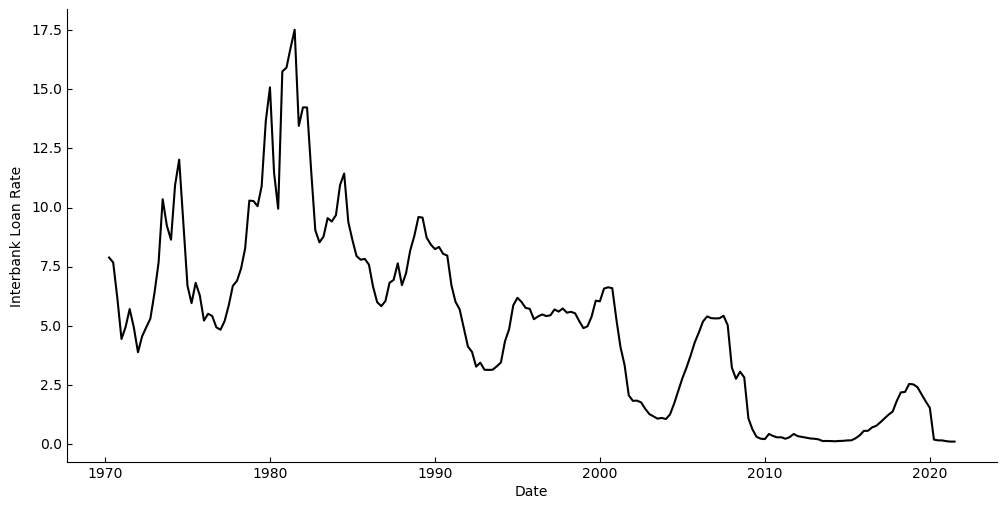

In [ ]:
fig = plt.figure(figsize=(12,6), dpi= 100, facecolor=None, edgecolor='k', clear=True)
ax = Subplot(fig, 111)
fig.add_subplot(ax)
ax.axis["right"].set_visible(False)
ax.axis["top"].set_visible(False)
plt.xlabel('Date')
plt.ylabel('Interbank Loan Rate')
plt.plot(data.observation_date, data.Interbank_Loan, color="black")
plt.show()

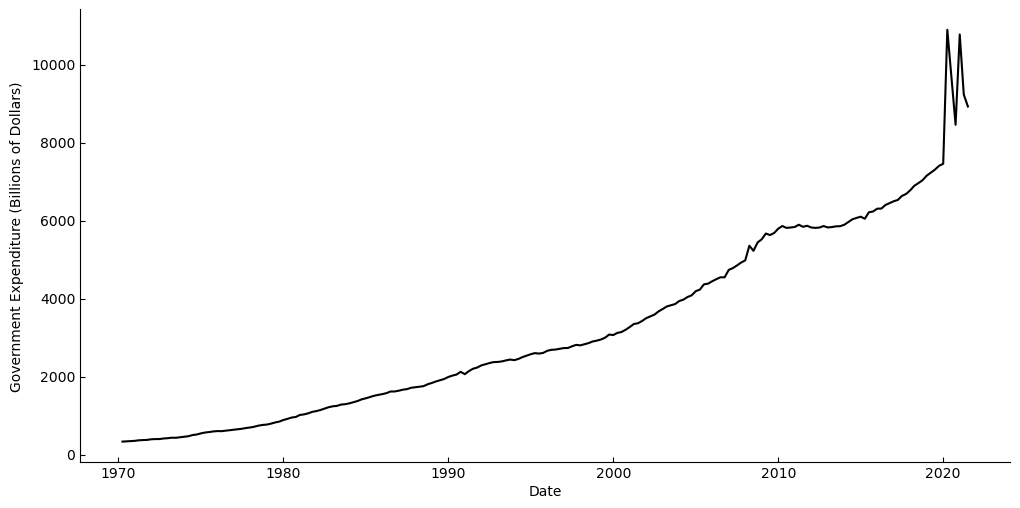

In [ ]:
fig = plt.figure(figsize=(12,6), dpi= 100, facecolor=None, edgecolor='k', clear=True)
ax = Subplot(fig, 111)
fig.add_subplot(ax)
ax.axis["right"].set_visible(False)
ax.axis["top"].set_visible(False)
plt.xlabel('Date')
plt.ylabel('Government Expenditure (Billions of Dollars)')
plt.plot(data.observation_date, data.Government_Expenditure, color="black")
plt.show()

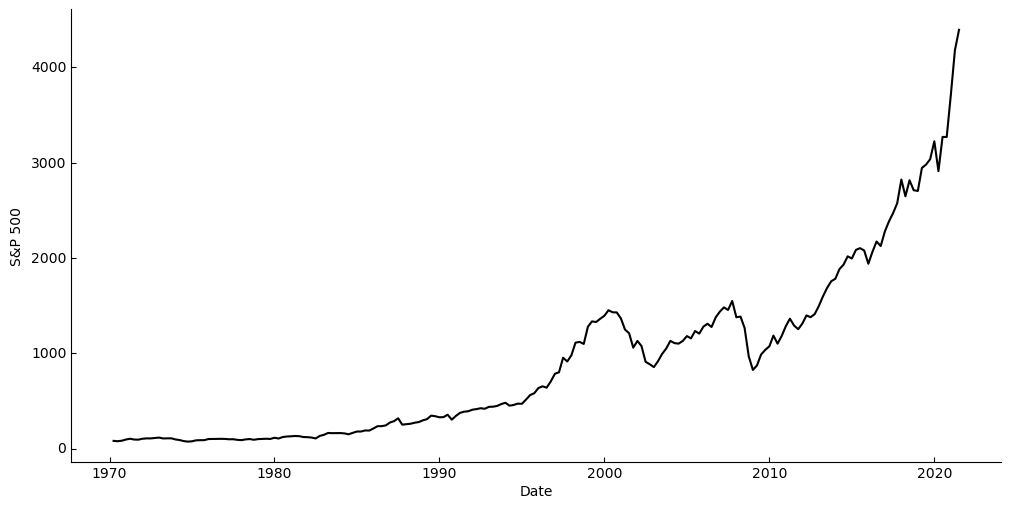

In [ ]:
fig = plt.figure(figsize=(12,6), dpi= 100, facecolor=None, edgecolor='k', clear=True)
ax = Subplot(fig, 111)
fig.add_subplot(ax)
ax.axis["right"].set_visible(False)
ax.axis["top"].set_visible(False)
plt.xlabel('Date')
plt.ylabel('S&P 500')
plt.plot(data.observation_date, data.SP_500, color="black")
plt.show()

### LTSM Equation

$$ P^{s} = (P^s_t)_{t \in T} $$

$$ R^{m,s}_t = \frac {P^{s}_t} {P^{s}_{t-m}} -1 $$

$$ R^{m,s}_t = \frac {P^{s}_t} {P^{s}_{t-m}} -1 $$

#### LTSM Attempt 1

#### Sources 
https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

In [ ]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [ ]:
# load dataset
data = pd.read_excel(os.path.join("./Data/Quarterly/","Combined Quarterly Data.xlsx"),sheet_name='Combined', header=0, index_col=0)
values = data.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.000000   0.605338   0.000000   0.000000   0.770833   0.000000   
2   0.000141   0.601775   0.000845   0.001706   0.755208   0.000696   
3   0.000334   0.571576   0.000961   0.004122   0.651042   0.001438   
4   0.000518   0.414277   0.003066   0.005544   0.390625   0.001846   
5   0.000754   0.333589   0.004021   0.007107   0.437500   0.003231   

   var7(t-1)   var1(t)  
1   0.001763  0.000141  
2   0.000960  0.000334  
3   0.002164  0.000518  
4   0.005086  0.000754  
5   0.006954  0.000951  


In [ ]:
# split into train and test sets
values = reframed.values
n_train_quarters = 4
train = values[:n_train_quarters, :]
test = values[n_train_quarters:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(4, 1, 7) (4,) (201, 1, 7) (201,)


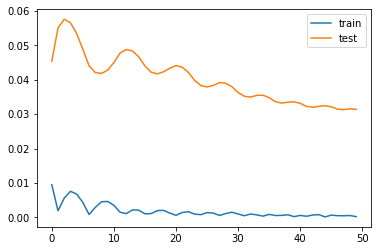

In [ ]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=0, shuffle=True)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 2360.050


#### LTSM Attempt 2

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Attention
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras import backend as K

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import metrics

import datetime

In [ ]:
df = pd.read_excel(os.path.join("./Data/Quarterly/","Combined Quarterly Data.xlsx"),sheet_name='Combined', header=0, index_col=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 206 entries, 1970-04-01 to 2021-07-01
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   M1                      206 non-null    float64
 1   IGREA                   206 non-null    float64
 2   GDP                     206 non-null    float64
 3   CPI                     206 non-null    float64
 4   Interbank_Loan          206 non-null    float64
 5   Government_Expenditure  206 non-null    float64
 6   SP_500                  206 non-null    float64
dtypes: float64(7)
memory usage: 12.9 KB


In [ ]:
df.describe() 

,M1,IGREA,GDP,CPI,Interbank_Loan,Government_Expenditure,SP_500
count,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,1710.288835,0.360652,9278.041476,151.991335,5.104668,3235.413592,915.171602
std,2912.715979,54.105763,6356.521157,68.028295,3.835079,2374.996841,901.601846
min,207.166667,-146.226317,1067.375000,38.633333,0.100000,339.049000,73.900000
25%,487.791667,-37.209772,3499.771750,98.283333,1.770833,1248.141000,146.640000
50%,1093.783333,-8.767825,7820.527000,154.383333,5.266667,2642.687500,608.760000
75%,1505.066667,30.006501,14640.488000,213.763250,7.370833,5431.003750,1355.992500
max,19650.700000,185.318980,23173.496000,273.138333,17.520000,10910.420000,4395.260000


In [ ]:
df.head(10)

,M1,IGREA,GDP,CPI,Interbank_Loan,Government_Expenditure,SP_500
observation_date,,,,,,,
1970-04-01,207.166667,54.470539,1067.375,38.633333,7.886667,339.049,81.52
1970-07-01,209.900000,53.289409,1086.059,39.033333,7.676667,346.412,78.05
1970-10-01,213.666667,43.277180,1088.608,39.600000,6.170000,354.250,83.25
1971-01-01,217.233333,-8.874567,1135.156,39.933333,4.440000,358.566,95.88
1971-04-01,221.833333,-35.626558,1156.271,40.300000,4.943333,373.206,103.95
1971-07-01,225.666667,-57.964624,1177.675,40.700000,5.706667,377.132,95.58
1971-10-01,227.766667,-50.710516,1190.297,41.000000,4.930000,383.306,94.23
1972-01-01,232.233333,-65.701634,1230.609,41.333333,3.880000,399.428,103.94
1972-04-01,236.033333,-64.040521,1266.369,41.600000,4.550000,403.929,107.67


M1


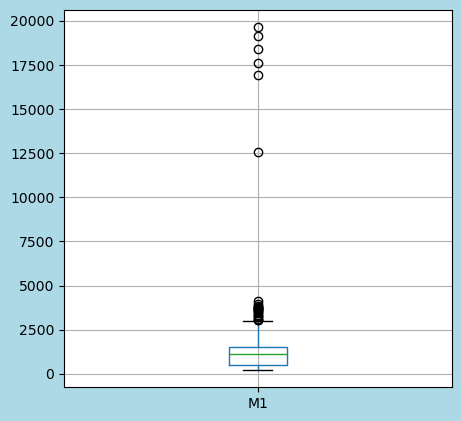

IGREA


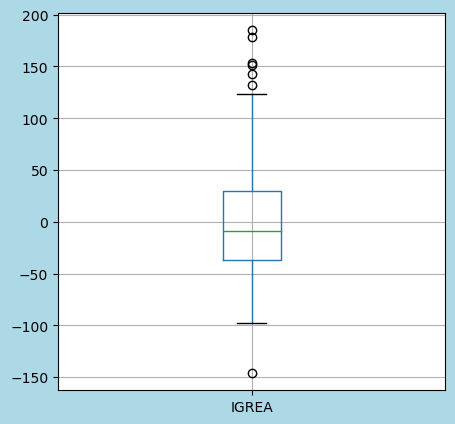

GDP


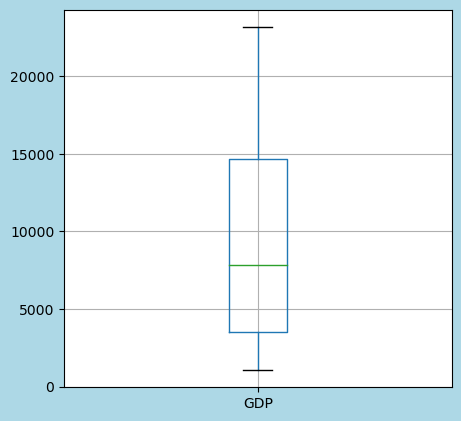

CPI


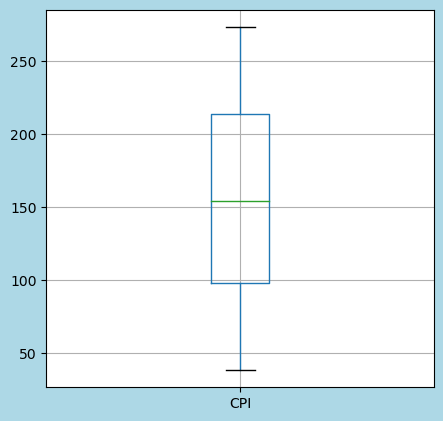

Interbank_Loan


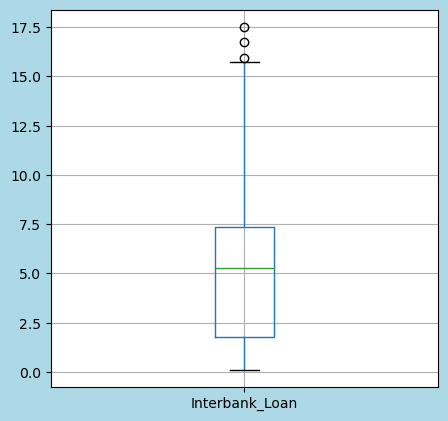

Government_Expenditure


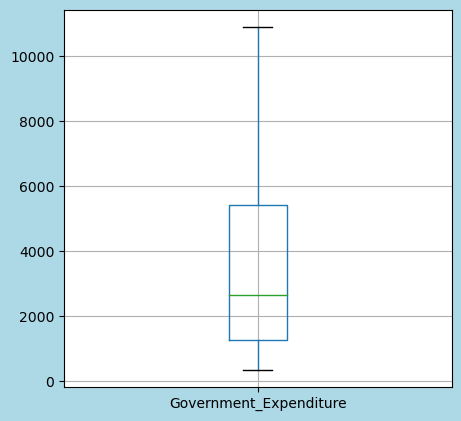

SP_500


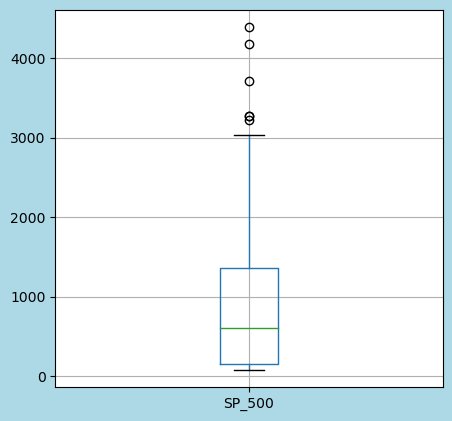

In [ ]:
columns = list(df)

for col in columns:
    print(col)
    plt.figure(figsize=(5,5), dpi= 100, facecolor='lightblue', edgecolor='k')
    df.boxplot(column=col)
    plt.show()

In [ ]:
train_split = 0.8
test_split = 0.2

training_data_count = round(len(df)*train_split)
print("Train count: " + str(training_data_count))

test_data_count = len(df) - training_data_count
print("Test count: " + str(test_data_count))

print(f"Test Percentage:  {str(round(test_data_count/(training_data_count+test_data_count)*100))}%")

Train count: 165
Test count: 41
Test Percentage:  20%


#### Data Cleansing

In [ ]:
print("Number of missing data points for each field")
df.isna().sum()

Number of missing data points for each field


M1                        0
IGREA                     0
GDP                       0
CPI                       0
Interbank_Loan            0
Government_Expenditure    0
SP_500                    0
dtype: int64

In [ ]:
print("Percentage of missing data")
df.isna().sum()*100/len(df)

Percentage of missing data


M1                        0.0
IGREA                     0.0
GDP                       0.0
CPI                       0.0
Interbank_Loan            0.0
Government_Expenditure    0.0
SP_500                    0.0
dtype: float64

#### Split Training & Test Data

In [ ]:
features = ['M1', 'IGREA','GDP', 'CPI', 'Interbank_Loan', 'Government_Expenditure']
target = ['SP_500']

In [ ]:
df['Stock-Period_Ahead'] = df['SP_500'].shift(periods=-1)

In [ ]:
train_set = df.iloc[:training_data_count+1]
train_set = train_set[:-1]

test_set = df.iloc[-test_data_count:]
test_set = test_set.dropna()

In [ ]:
def scale(df):
    """
    Applies Min Max Scaling transformation to dataset and splits data between features and target.

    Parameters
    ----------
    df : DataFrame
        Dataset to be transformed (Data should be split between training and test before transformation)

    Returns
    -------
    X : DataFrame
        X data (features)
    y : DataFrame
        y data (target)
    """
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()

    feature_scaler = scaler.fit(df[features])
    feature_transform = scaler.fit_transform(df[features])
    feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)

    target_scaler = scaler.fit(np.array(df[target]).reshape(-1, 1))
    target_transform = scaler.fit_transform(df[target])
    target_transform= pd.DataFrame(columns=target, data=target_transform, index=df.index)

    X = feature_transform
    y = target_transform
    
    return X, y, target_scaler

In [ ]:
X_train, y_train, train_scaler = scale(train_set)

In [ ]:
X_test, y_test, test_scaler = scale(test_set)

In [ ]:
 # Convert to np array for modelling:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
# LSTM model architecture:
model = Sequential()
model.add(LSTM(100, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
#Create Early stoping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=30,
    verbose=1, 
    mode='min',
    restore_best_weights=True)

In [ ]:
# Fit Model
history = model.fit(X_train, y_train, 
                   epochs=1000, batch_size=128, 
                   validation_data=(X_test, y_test), 
                   verbose=1, shuffle=False,
                   callbacks=[early_stop])

Epoch 1/1000
2/2 [==============================] - 0s 237ms/step - loss: 0.2345 - val_loss: 0.1876
Epoch 2/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.2237 - val_loss: 0.1784
Epoch 3/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.2137 - val_loss: 0.1693
Epoch 4/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.2040 - val_loss: 0.1606
Epoch 5/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.1946 - val_loss: 0.1521
Epoch 6/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.1855 - val_loss: 0.1439
Epoch 7/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.1765 - val_loss: 0.1358
Epoch 8/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.1679 - val_loss: 0.1279
Epoch 9/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.1595 - val_loss: 0.1203
Epoch 10/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.1513 - val_loss: 0.1128
Epoch 11

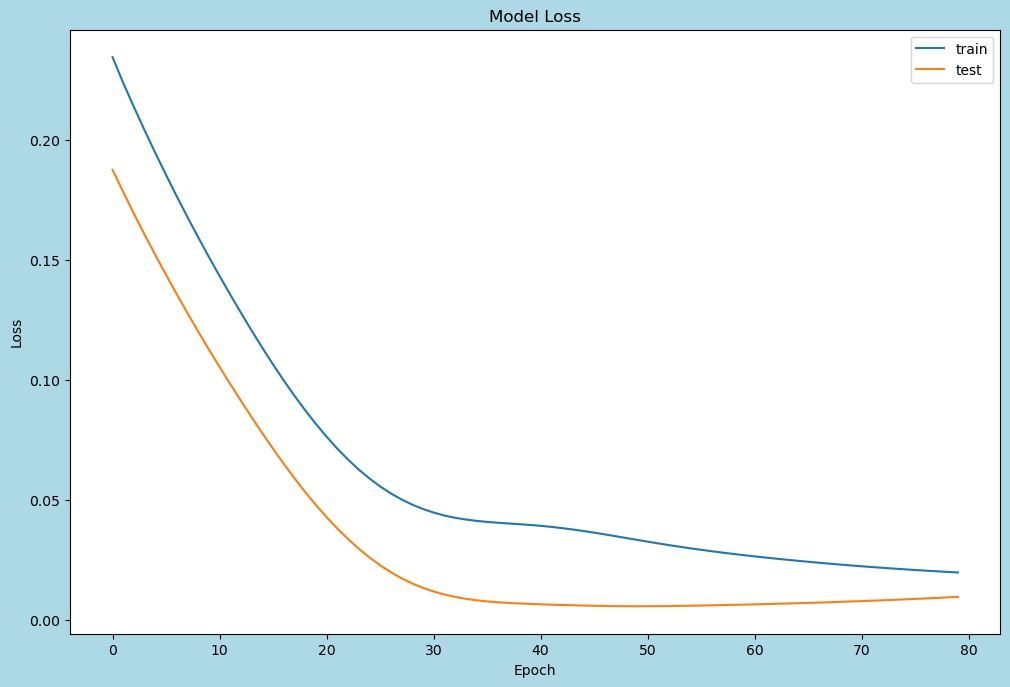

In [ ]:
#Plot Loss
plt.figure(figsize=(12,8), dpi= 100, facecolor='lightblue', edgecolor='k')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Test

In [ ]:
# Price prediction:
y_pred = model.predict(X_test)

In [ ]:
predictions = pd.DataFrame(y_pred, index = y_test.index)

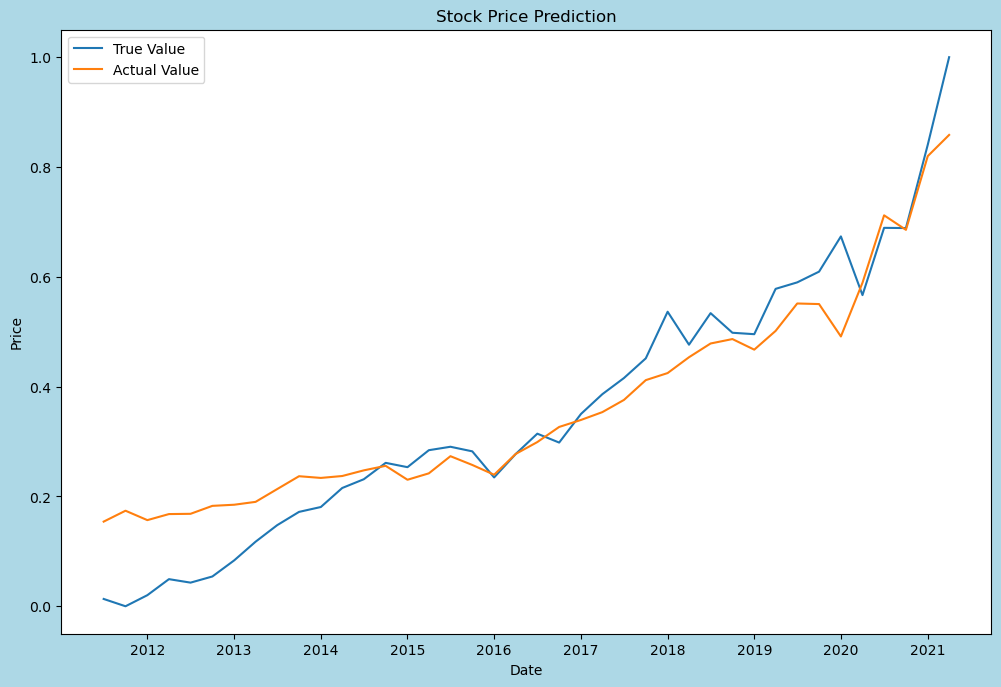

In [ ]:
plt.figure(figsize=(12,8), dpi= 100, facecolor='lightblue', edgecolor='k')
plt.plot(y_test, label='True Value')
plt.plot(predictions, label='Actual Value')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
print("------------------------------------------------------")
print("MSE: " + str(mean_squared_error(y_test, predictions)))
print("------------------------------------------------------")
print("MAE: " + str(mean_absolute_error(y_test, predictions)))
print("------------------------------------------------------")
print("R2 Score: " + str(r2_score(y_test, predictions)))
print("------------------------------------------------------")

------------------------------------------------------
MSE: 0.005847433787747459
------------------------------------------------------
MAE: 0.057512705757156
------------------------------------------------------
R2 Score: 0.8979220735677769
------------------------------------------------------


In [ ]:
predicted_price = test_scaler.inverse_transform(predictions)
actual_price = test_scaler.inverse_transform(y_test)

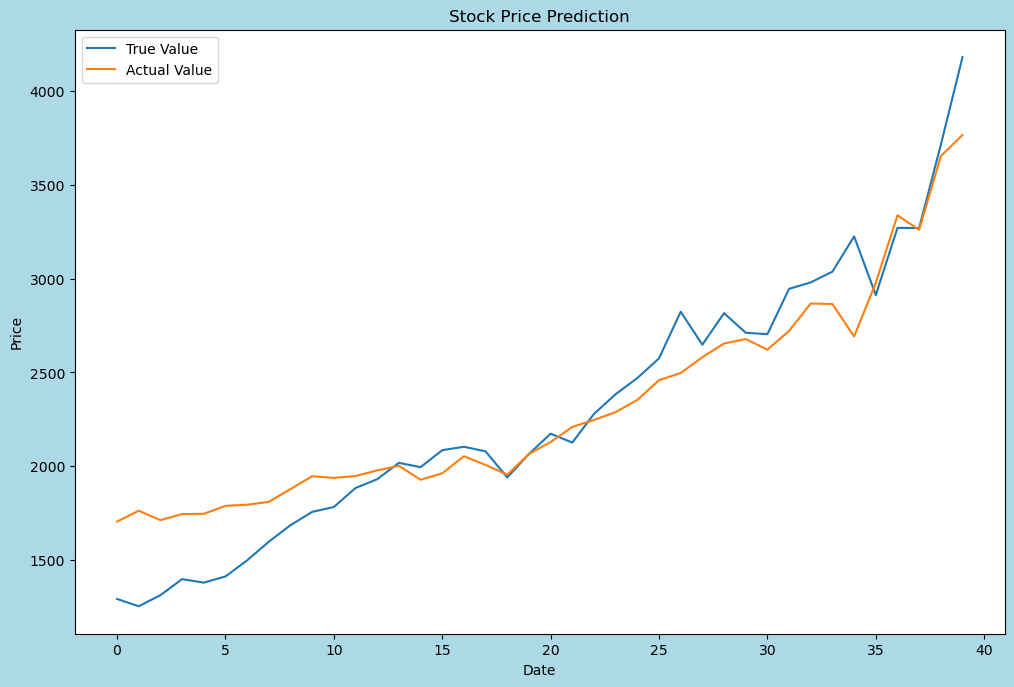

In [ ]:
plt.figure(figsize=(12,8), dpi= 100, facecolor='lightblue', edgecolor='k')
plt.plot(actual_price, label='True Value')
plt.plot(predicted_price, label='Actual Value')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
print("------------------------------------------------------")
print("MSE: " + str(mean_squared_error(actual_price, predicted_price)))
print("------------------------------------------------------")
print("MAE: " + str(mean_absolute_error(actual_price, predicted_price)))
print("------------------------------------------------------")
print("R2 Score: " + str(r2_score(actual_price, predicted_price)))
print("------------------------------------------------------")

------------------------------------------------------
MSE: 50126.673435863246
------------------------------------------------------
MAE: 168.38972229003906
------------------------------------------------------
R2 Score: 0.8979220754386992
------------------------------------------------------


In [5]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Dissertation/Quarterly_Analysis.ipynb')
27